https://www.kaggle.com/yugandhar123/pca-vs-lda-classification-comparison-100-score

## Part1

### Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)
%cd /content/drive/My Drive/Applied 2020 Şubat/datasets

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Applied 2020 Şubat/datasets


In [0]:
!ls

creditcard.csv	       german_credit_data.csv  RovitDatasetBig_.zip  spam.csv
data_hand_pose.pickle  heart.csv	       RovitDataset.zip      Wine.csv


In [0]:
from matplotlib import pyplot as plt

In [0]:
import pandas as pd
with open('Wine.csv') as f:
    df = pd.read_csv(f, sep = ',') 

print(df.shape)
df.iloc[:4]


(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1


### Data Examination

In [0]:
for col in df:
  print(col)
  

Alcohol
Malic_Acid
Ash
Ash_Alcanity
Magnesium
Total_Phenols
Flavanoids
Nonflavanoid_Phenols
Proanthocyanins
Color_Intensity
Hue
OD280
Proline
Customer_Segment


In [0]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


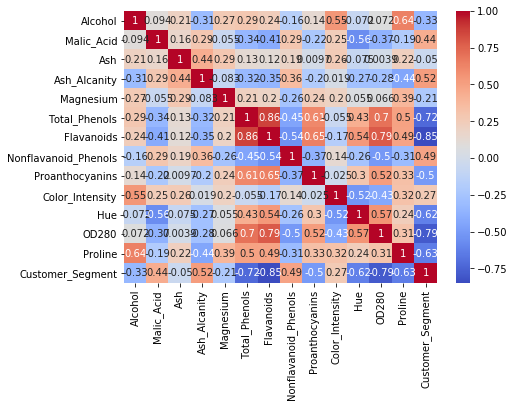

In [0]:
import seaborn as sns

correlation=df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [0]:
import numpy as np
for item in range(5):
  print(np.sum(df['Customer_Segment']==item))

0
59
71
48
0


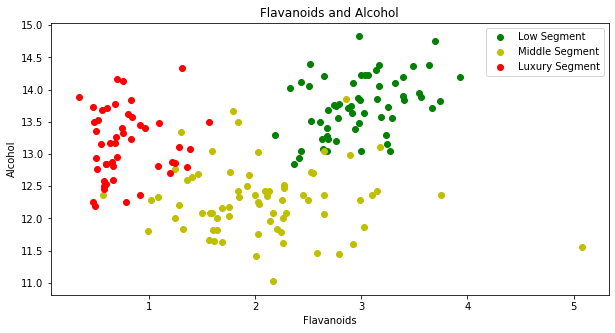

In [0]:
p1 = df[df['Customer_Segment'] == 1] 
p2 = df[df['Customer_Segment'] == 2] 
p3 = df[df['Customer_Segment'] == 3] 
plt.figure(figsize=(10,5))
plt.scatter(p1['Flavanoids'], p1['Alcohol'],c='g')
plt.scatter(p2['Flavanoids'], p2['Alcohol'],c='y')
plt.scatter(p3['Flavanoids'], p3['Alcohol'],c='r')
plt.legend(['Low Segment','Middle Segment','Luxury Segment'])
plt.title('Flavanoids and Alcohol')
plt.xlabel('Flavanoids')
plt.ylabel('Alcohol')
#plt.xlim([0,175000])
#plt.ylim([0,2500])
plt.show()

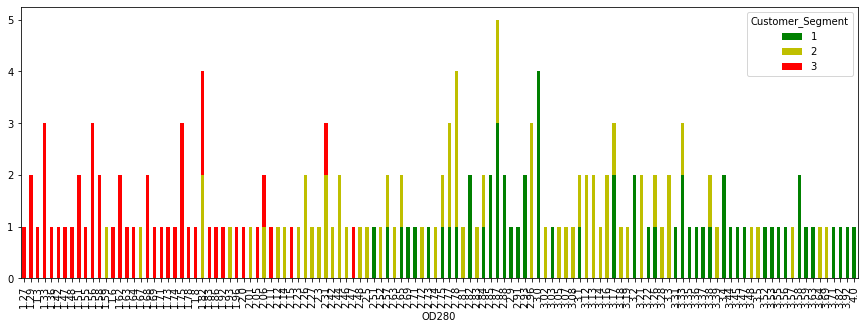

In [0]:
pd.crosstab(df.OD280,df.Customer_Segment).plot(kind="bar",figsize=(15,5), color = ['g','y','r'],stacked=True)

### Preprocessing

In [0]:
a = pd.get_dummies(df['Customer_Segment'], prefix = "cs")

frames = [df, a]
df = pd.concat(frames, axis = 1)


x = df.drop(columns = ['Customer_Segment','cs_1','cs_2','cs_3'],axis=1)
y=pd.concat([df['cs_1'],df['cs_2'],df['cs_3']],axis=1)


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.137207,-0.849502,0.487926,0.902373,-1.105268,0.424438,0.261765,0.549108,-0.965221,-0.933525,-0.120430,0.816836,-1.152447
1,1.432144,0.155881,0.414820,0.151661,-0.613775,-0.985614,-1.334543,0.629686,-0.614804,2.007951,-1.480505,-1.273579,-0.276711
2,0.938038,-0.723829,1.218995,0.001518,2.264972,1.049347,0.713550,1.113154,-0.422075,0.147900,1.283518,0.548472,1.554373
3,0.604516,1.125357,-0.645229,0.001518,-0.824415,-1.081754,-1.555415,1.757779,-1.245555,0.277671,-0.646911,-1.118210,-0.531471
4,1.086270,-0.400670,0.816907,-1.349764,0.088358,1.530047,1.536802,-1.545922,0.191154,0.160877,-0.339797,1.339440,1.108544


In [0]:
pd.DataFrame(y_train).head()

,cs_1,cs_2,cs_3
114,0,1,0
172,0,0,1
33,1,0,0
138,0,0,1
42,1,0,0


In [0]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(x_train)
pca.explained_variance_ratio_

array([0.36834978, 0.20123696, 0.1203373 , 0.06648445, 0.05950359,
       0.04081924, 0.0403025 , 0.02819688, 0.0229256 , 0.0169632 ,
       0.01517801, 0.0123905 , 0.00731197])

In [0]:
pca=PCA(3)
pca.fit(x_train)
pca.explained_variance_ratio_

array([0.36834978, 0.20123696, 0.1203373 ])

In [0]:
pca_train=pca.transform(x_train)
pca_test=pca.transform(x_test)

In [0]:
y_train['cs_1']==1

114    False
172    False
33      True
138    False
42      True
       ...  
72     False
13      True
175    False
24      True
34      True
Name: cs_1, Length: 124, dtype: bool

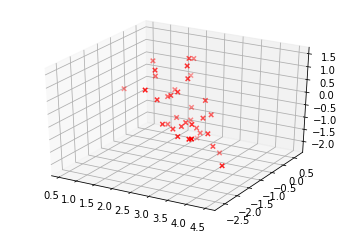

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_train[y_train['cs_1']==1,0],pca_train[y_train['cs_1']==1,1],pca_train[y_train['cs_1']==1,2], c='red', marker='x')

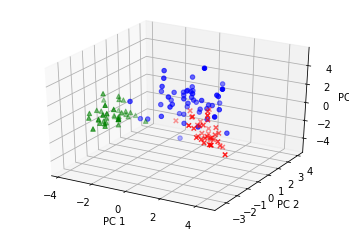

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_train[y_train['cs_1']==1,0],pca_train[y_train['cs_1']==1,1],pca_train[y_train['cs_1']==1,2], c='red', marker='x')
ax.scatter(pca_train[y_train['cs_2']==1,0],pca_train[y_train['cs_2']==1,1],pca_train[y_train['cs_2']==1,2], c='blue', marker='o')
ax.scatter(pca_train[y_train['cs_3']==1,0],pca_train[y_train['cs_3']==1,1],pca_train[y_train['cs_3']==1,2], c='green', marker='^')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

###Models

Logistic Regression

In [0]:
# from sklearn.linear_model import LogisticRegression
# accuracies = {}

# lr = LogisticRegression()
# lr.fit(x_train,y_train)
# acc = lr.score(x_test,y_test)*100

# accuracies['Logistic Regression'] = acc
# print("Test Accuracy {:.2f}%".format(acc))


K - Nearest Neighbour

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("K = {} Accuracy: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

K = 2 Accuracy: 94.44%


Best K Value

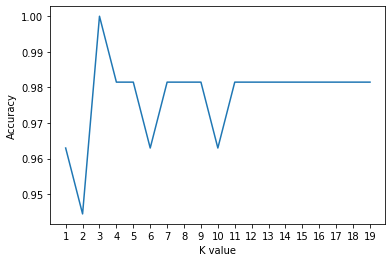

Maximum KNN Score is 100.00%


In [0]:
import numpy as np
accList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(x_train, y_train)
    accList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), accList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

acc = max(accList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

SVM

In [0]:
# from sklearn.svm import SVC

# svm = SVC(random_state = 1)
# svm.fit(x_train, y_train)

# acc = svm.score(x_test,y_test)*100
# accuracies['SVM'] = acc
# print("Test Accuracy: {:.2f}%".format(acc))

Naive Bayes

In [0]:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(x_train, y_train)

# acc = nb.score(x_test,y_test)*100
# accuracies['Naive Bayes'] = acc
# print("Test Accuracy: {:.2f}%".format(acc))

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 87.04%


Random Forest

In [0]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 98.15%


###Compare

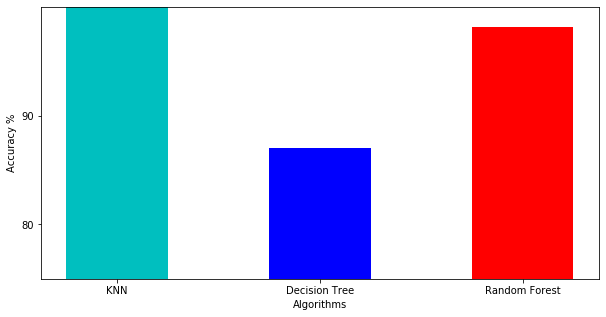

In [0]:
colors = ['c','b','r','y','m','g']

plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(x=accuracies.keys(), height=list(accuracies.values()),width=0.5,color=colors)
plt.ylim([75,100])
plt.show()

In [0]:
#y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test).argmax(axis=1)
#y_head_svm = svm.predict(x_test)
#y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test).argmax(axis=1)
y_head_rf = rf.predict(x_test).argmax(axis=1)

In [0]:
from sklearn.metrics import confusion_matrix

#cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test.values.argmax(axis=1),y_head_knn)
#cm_svm = confusion_matrix(y_test,y_head_svm)
#cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test.values.argmax(axis=1),y_head_dtc)
cm_rf = confusion_matrix(y_test.values.argmax(axis=1),y_head_rf)

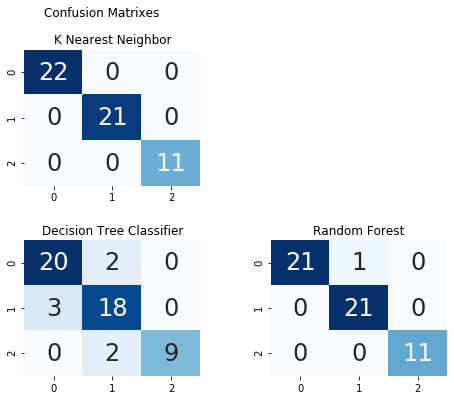

In [0]:
import seaborn as sns
plt.figure(figsize=(12,6))

plt.suptitle("Confusion Matrixes",fontsize=12)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

# plt.subplot(2,3,1)
# plt.title("Logistic Regression")
# sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbor")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# plt.subplot(2,3,3)
# plt.title("Support Vector Machine")
# sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# plt.subplot(2,3,4)
# plt.title("Naive Bayes")
# sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

## Part 2

### Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)
%cd /content/drive/My Drive/Applied 2020 Şubat/datasets

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Applied 2020 Şubat/datasets


In [0]:
!ls

creditcard.csv	       german_credit_data.csv  RovitDatasetBig_.zip  spam.csv
data_hand_pose.pickle  heart.csv	       RovitDataset.zip      Wine.csv


In [0]:
from matplotlib import pyplot as plt

In [0]:
import pandas as pd
with open('Wine.csv') as f:
    df = pd.read_csv(f, sep = ',') 

print(df.shape)
df.iloc[:4]


(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1


### Preprocessing

In [0]:
X=df.drop('Customer_Segment',axis=1)
y=df['Customer_Segment']

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(X,y,test_size=0.30)

### Models

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda_train = lda.fit(X_train, Y_train)
lda.explained_variance_ratio_

array([0.68795274, 0.31204726])

In [0]:
lda_train=lda.transform(X_train)
lda_test=lda.transform(X_test)

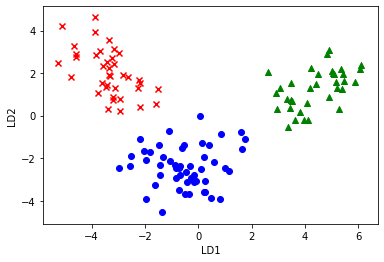

In [0]:
plt.scatter(lda_train[Y_train==1,0],lda_train[Y_train==1,1], c='red', marker='x')
plt.scatter(lda_train[Y_train==2,0],lda_train[Y_train==2,1], c='blue', marker='o')
plt.scatter(lda_train[Y_train==3,0],lda_train[Y_train==3,1], c='green', marker='^')

plt.xlabel('LD1')
plt.ylabel('LD2')

plt.show()

In [0]:
Ypreds=lda.predict(X_test)
lda.score(X_test,Y_test)

0.9814814814814815

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lda, lda_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0


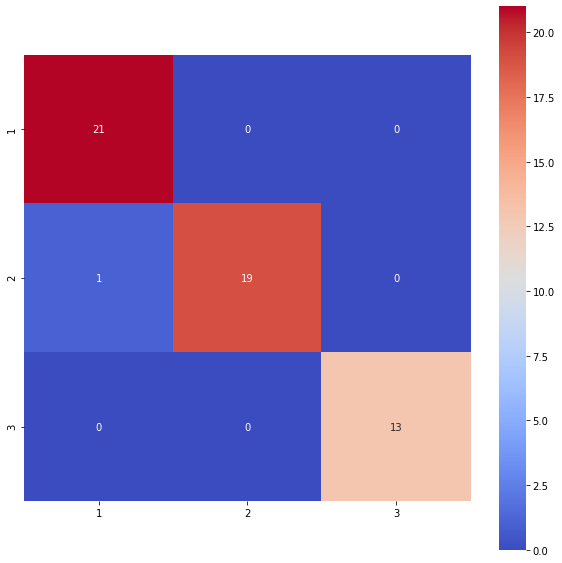

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
cm = confusion_matrix(Y_test,Ypreds)
xy=np.array([1,2,3])
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,cmap='coolwarm',xticklabels=xy,yticklabels=xy)